### Figure 3A

To create Figure 3A we import the fluxes predicted by Pheflux2.0, normalize them and look for the flows of interest, in this case the Acetyl-CoA and SAM cosubstrates.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Here we load the predicted fluxes from Pheflux as a dictionary.
list_time=[48.32,48.63,48.75,48.83,48.98,49.15,49.32,49.48,49.65,49.9,50.16,50.33,50.87,51.4,51.95]
folder="/results/"
T1= pd.read_csv(folder+"T1_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T2= pd.read_csv(folder+"T2_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T3= pd.read_csv(folder+"T3_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T4= pd.read_csv(folder+"T4_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T5= pd.read_csv(folder+"T5_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T6= pd.read_csv(folder+"T6_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T7= pd.read_csv(folder+"T7_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T8= pd.read_csv(folder+"T8_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T9= pd.read_csv(folder+"T9_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T10= pd.read_csv(folder+"T10_mean.csv", sep="\,", index_col=0,names=["flux"],skiprows=1) 
T11= pd.read_csv(folder+"T12_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T12= pd.read_csv(folder+"T13_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T13= pd.read_csv(folder+"T14_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T14= pd.read_csv(folder+"T15_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)
T15= pd.read_csv(folder+"T16_Solve_Succeeded.csv", sep="\t", index_col=0,names=["flux"],skiprows=1)

#create df
allFluxes=pd.DataFrame()
index=0
for i in [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15]:
    index += 1
    allFluxes["T"+str(index)]=i["flux"]/abs(i).sum(axis=0)[0] #Normalization

In [13]:
#Save Acetyl-CoA and SAM fluxes vectors as list
SAM = allFluxes.loc["R_EX_PME"].tolist()
ACOA= allFluxes.loc["R_EX_PAC"].tolist()

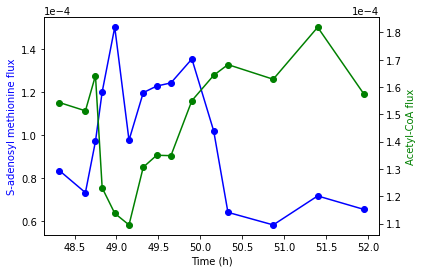

In [14]:
#Plot Acetyl-CoA / SAM
fig, axes = plt.subplots()
axes.plot(list_time, SAM, color='b')
axes.scatter(list_time, SAM, color='b') # Agregar puntos en la línea SAM
axes.set_xlabel('Time (h)')
axes.set_ylabel('S-adenosyl methionine flux', color='b')
axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

twin_axes = axes.twinx()
twin_axes.plot(list_time, ACOA, 'g')
twin_axes.scatter(list_time, ACOA, color='g') # Agregar puntos en la línea ACOA
twin_axes.set_ylabel('Acetyl-CoA flux', color='g')
twin_axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig("Fig3A.pdf")